<a href="https://colab.research.google.com/github/ronaldosilvak/machine_learning/blob/main/MachineLearning_Classifica%C3%A7%C3%A3o_de_medicamentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problema:**

Imagine que você é um pesquisador médico compilando dados para um estudo. Você coletou dados sobre um conjunto de pacientes, todos sofrendo da mesma doença. Durante o tratamento, cada paciente respondeu a um dos 5 medicamentos, Medicamento A, Medicamento B, Medicamento c, Medicamento x e y.

Parte do seu trabalho é construir um modelo para descobrir qual medicamento pode ser apropriado para um futuro paciente com a mesma doença. As características deste conjunto de dados são idade, sexo, pressão arterial e colesterol dos pacientes, e o alvo é o medicamento ao qual cada paciente respondeu.

É uma amostra de classificador multiclasse e você pode usar a parte de treinamento do conjunto de dados para construir uma árvore de decisão e, em seguida, usá-la para prever a classe de um paciente desconhecido ou para prescrever um medicamento a um novo paciente.

Fonte de dados: IBM


# Metadados

**Variáveis explicativas (X)**

Age -> Idade do paciente

Sex -> Sexo do paciente

BP (Blood Pressure) -> Pressão arterial

Cholesterol -> Colesterol do paciente (LDL)

Na_to_K -> Níveis de sódio e potássio



**Variável independente (y)**

Drug -> Remédios


***Importando os dados***

In [294]:
import pandas as pd

In [295]:
dados = pd.read_csv('/content/drug200.csv')
dados.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


***Análise exploratória***

In [296]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [297]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [298]:
dados.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


Entendendo o comportamento das variáveis com níveis máximos de sódio e potássio

In [299]:
dados[dados['Na_to_K']>38]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
96,58,F,LOW,HIGH,38.247,drugY


Entendendo o comportamento das variáveis com níveis mínimos de sódio e potássio

In [300]:
dados[dados['Na_to_K']<7]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
111,47,F,NORMAL,NORMAL,6.683,drugX
140,49,M,HIGH,NORMAL,6.269,drugA
193,72,M,LOW,HIGH,6.769,drugC


Entendendo o comportamento dos níveis de colesterol

In [301]:
# É possível ver que os remédios X e Y, corroboram para uma minuciosa tendência para os pacientes terem maiores níveis de colesterol
dados.groupby(['Sex', 'Drug', 'Cholesterol'])['Cholesterol'].count()

Sex  Drug   Cholesterol
F    drugA  HIGH            6
            NORMAL          3
     drugB  HIGH            2
            NORMAL          4
     drugC  HIGH            7
     drugX  HIGH           12
            NORMAL         15
     drugY  HIGH           22
            NORMAL         25
M    drugA  HIGH            6
            NORMAL          8
     drugB  HIGH            6
            NORMAL          4
     drugC  HIGH            9
     drugX  HIGH            8
            NORMAL         19
     drugY  HIGH           25
            NORMAL         19
Name: Cholesterol, dtype: int64

In [302]:
dados.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [303]:
dados

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [304]:
contagem_colesterol = dados.groupby(['Cholesterol', 'Drug']).size().reset_index(name='Contagem')

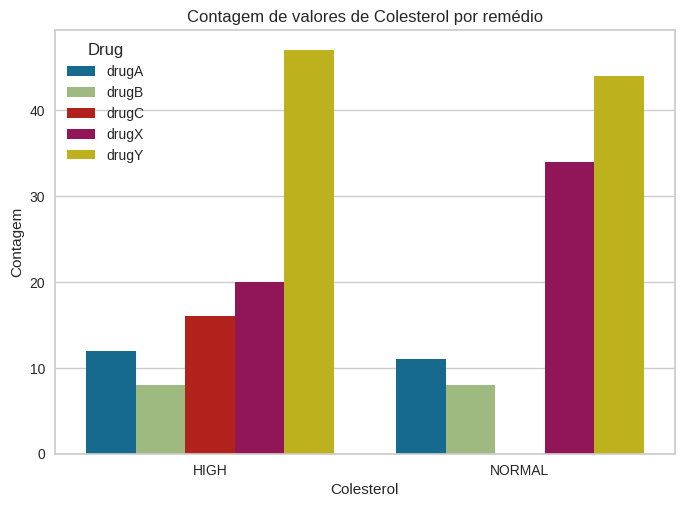

In [305]:
sns.barplot(data=contagem_colesterol, x='Cholesterol', y='Contagem', hue='Drug')
plt.xlabel('Colesterol')
plt.ylabel('Contagem')
plt.title('Contagem de valores de Colesterol por remédio')
plt.show()

In [306]:
dados.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [307]:
# É possível enxergar uma incidência do remédio Y na correção de muitas variáveis
grafico = px.scatter_matrix(dados, dimensions=['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'], color='Drug')
grafico.show()

Verificando dados inconscistentes

In [308]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [309]:
dados['Age'].describe()

count    200.000000
mean      44.315000
std       16.544315
min       15.000000
25%       31.000000
50%       45.000000
75%       58.000000
max       74.000000
Name: Age, dtype: float64

In [310]:
dados['Sex'].unique()

array(['F', 'M'], dtype=object)

# Pré-processamento(LabelEncoder)

In [311]:
from sklearn.preprocessing import LabelEncoder

In [312]:
dados.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [313]:
label_encoder = LabelEncoder()

In [314]:
dados['Sex'] = label_encoder.fit_transform(dados['Sex'])
dados['Cholesterol'] = label_encoder.fit_transform(dados['Cholesterol'])
dados['BP'] = label_encoder.fit_transform(dados['BP'])

**Sex** -> 0(F) & 1(M)

**BP** -> 0(HIGH), 1(LOW) & 2(Normal)

**Cholesterol** -> 0(HIGH), 1(LOW) & 2(Normal)

In [315]:
# label enconder aplicado!
dados

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY
...,...,...,...,...,...,...
195,56,0,1,0,11.567,drugC
196,16,1,1,0,12.006,drugC
197,52,1,2,0,9.894,drugX
198,23,1,2,1,14.020,drugX


# Criando os atributos previsores e explicativos

In [316]:
X = dados.drop('Drug', axis=1)
y = dados['Drug']

# Divisão das bases em treinamento e teste

In [317]:
from sklearn.model_selection import train_test_split

In [318]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.25, random_state=0)

In [319]:
X_treino.shape, y_treino.shape

((150, 5), (150,))

In [320]:
X_teste.shape, y_teste.shape

((50, 5), (50,))

# Salvando as variáveis

In [321]:
import pickle

In [322]:
with open('remedios_analysis.pkl', mode='wb') as f:
  pickle.dump([X_treino, X_teste, y_treino, y_teste], f)

# Naive Bayes - 86%

In [323]:
from sklearn.naive_bayes import GaussianNB

In [324]:
naive_bayes_model = GaussianNB()

In [325]:
naive_bayes_model.fit(X_treino, y_treino)

GaussianNB()

In [326]:
previsoes = naive_bayes_model.predict(X_teste)
previsoes

array(['drugC', 'drugX', 'drugY', 'drugY', 'drugY', 'drugX', 'drugX',
       'drugX', 'drugC', 'drugX', 'drugA', 'drugY', 'drugY', 'drugY',
       'drugB', 'drugC', 'drugY', 'drugY', 'drugX', 'drugA', 'drugA',
       'drugX', 'drugX', 'drugX', 'drugY', 'drugY', 'drugY', 'drugY',
       'drugY', 'drugX', 'drugX', 'drugC', 'drugA', 'drugX', 'drugY',
       'drugY', 'drugX', 'drugC', 'drugA', 'drugX', 'drugY', 'drugA',
       'drugY', 'drugY', 'drugY', 'drugX', 'drugX', 'drugY', 'drugA',
       'drugB'], dtype='<U5')

In [327]:
y_teste.values

array(['drugC', 'drugX', 'drugY', 'drugY', 'drugY', 'drugX', 'drugX',
       'drugX', 'drugY', 'drugX', 'drugA', 'drugY', 'drugY', 'drugY',
       'drugB', 'drugC', 'drugY', 'drugY', 'drugX', 'drugY', 'drugY',
       'drugX', 'drugX', 'drugX', 'drugY', 'drugY', 'drugY', 'drugY',
       'drugY', 'drugX', 'drugX', 'drugC', 'drugA', 'drugX', 'drugY',
       'drugY', 'drugX', 'drugY', 'drugA', 'drugX', 'drugY', 'drugA',
       'drugY', 'drugX', 'drugY', 'drugX', 'drugY', 'drugY', 'drugA',
       'drugY'], dtype=object)

Verificando acurácia do modelo NaiveBayes

In [328]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [329]:
accuracy_score(previsoes, y_teste)

0.86

In [330]:
confusion_matrix(previsoes, y_teste)

array([[ 5,  0,  0,  0,  2],
       [ 0,  1,  0,  0,  1],
       [ 0,  0,  3,  0,  2],
       [ 0,  0,  0, 15,  1],
       [ 0,  0,  0,  1, 19]])

Visualização gráfica da Matrix de confusão

In [331]:
from yellowbrick.classifier import ConfusionMatrix

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but GaussianNB was fitted with feature names



0.86

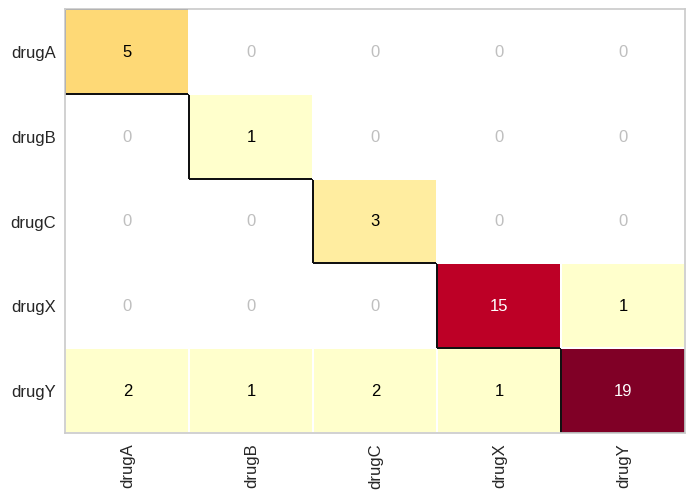

In [332]:
cm = ConfusionMatrix(naive_bayes_model)
cm.fit(X_treino, X_treino)
cm.score(X_teste, y_teste)

In [333]:
# Precision -> Quando o modelo fez uma classificação específica, o precision mede o quão aquele modelo estava correto
# Recall -> Quando a classe tinha uma classificação específica, o quanto o modelo classificou corretamente
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

       drugA       0.71      1.00      0.83         5
       drugB       0.50      1.00      0.67         1
       drugC       0.60      1.00      0.75         3
       drugX       0.94      0.94      0.94        16
       drugY       0.95      0.76      0.84        25

    accuracy                           0.86        50
   macro avg       0.74      0.94      0.81        50
weighted avg       0.89      0.86      0.86        50



# Árvore de decisão - 100% (Overfitting)

In [334]:
from sklearn.tree import DecisionTreeClassifier

In [335]:
with open('remedios_analysis.pkl', 'rb') as f:
  X_treino, X_teste, y_treino, y_teste = pickle.load(f)

In [336]:
decision_tree_drug = DecisionTreeClassifier(criterion='entropy', random_state=0)
decision_tree_drug.fit(X_treino, y_treino)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [337]:
# mede a importância de cada atributo/variável (ganho de informação)
decision_tree_drug.feature_importances_

array([0.1078323 , 0.        , 0.32571274, 0.0784988 , 0.48795616])

In [338]:
previsoes = decision_tree_drug.predict(X_teste)
previsoes

array(['drugC', 'drugX', 'drugY', 'drugY', 'drugY', 'drugX', 'drugX',
       'drugX', 'drugY', 'drugX', 'drugA', 'drugY', 'drugY', 'drugY',
       'drugB', 'drugC', 'drugY', 'drugY', 'drugX', 'drugY', 'drugY',
       'drugX', 'drugX', 'drugX', 'drugY', 'drugY', 'drugY', 'drugY',
       'drugY', 'drugX', 'drugX', 'drugC', 'drugA', 'drugX', 'drugY',
       'drugY', 'drugX', 'drugY', 'drugA', 'drugX', 'drugY', 'drugA',
       'drugY', 'drugX', 'drugY', 'drugX', 'drugY', 'drugY', 'drugA',
       'drugY'], dtype=object)

In [339]:
y_teste.values

array(['drugC', 'drugX', 'drugY', 'drugY', 'drugY', 'drugX', 'drugX',
       'drugX', 'drugY', 'drugX', 'drugA', 'drugY', 'drugY', 'drugY',
       'drugB', 'drugC', 'drugY', 'drugY', 'drugX', 'drugY', 'drugY',
       'drugX', 'drugX', 'drugX', 'drugY', 'drugY', 'drugY', 'drugY',
       'drugY', 'drugX', 'drugX', 'drugC', 'drugA', 'drugX', 'drugY',
       'drugY', 'drugX', 'drugY', 'drugA', 'drugX', 'drugY', 'drugA',
       'drugY', 'drugX', 'drugY', 'drugX', 'drugY', 'drugY', 'drugA',
       'drugY'], dtype=object)

Verificando a acurácia obtida

In [340]:
accuracy_score(previsoes, y_teste)

1.0

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



1.0

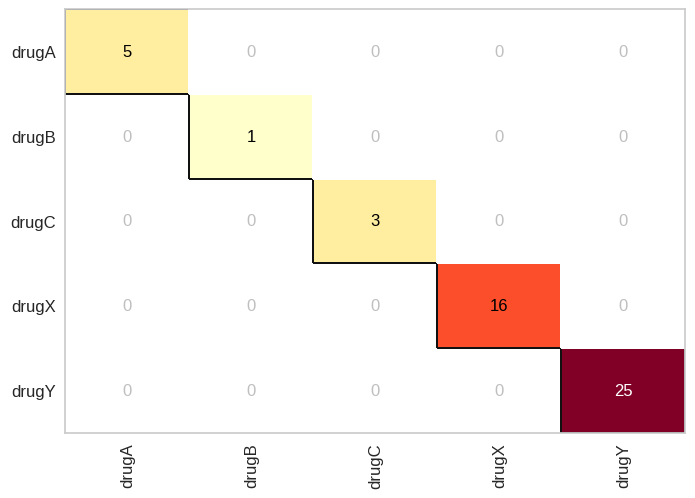

In [341]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(decision_tree_drug)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

In [342]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         5
       drugB       1.00      1.00      1.00         1
       drugC       1.00      1.00      1.00         3
       drugX       1.00      1.00      1.00        16
       drugY       1.00      1.00      1.00        25

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



Plotando a árvore de decisão

In [343]:
from sklearn import tree

In [344]:
dados.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [345]:
class_names = decision_tree_drug.classes_

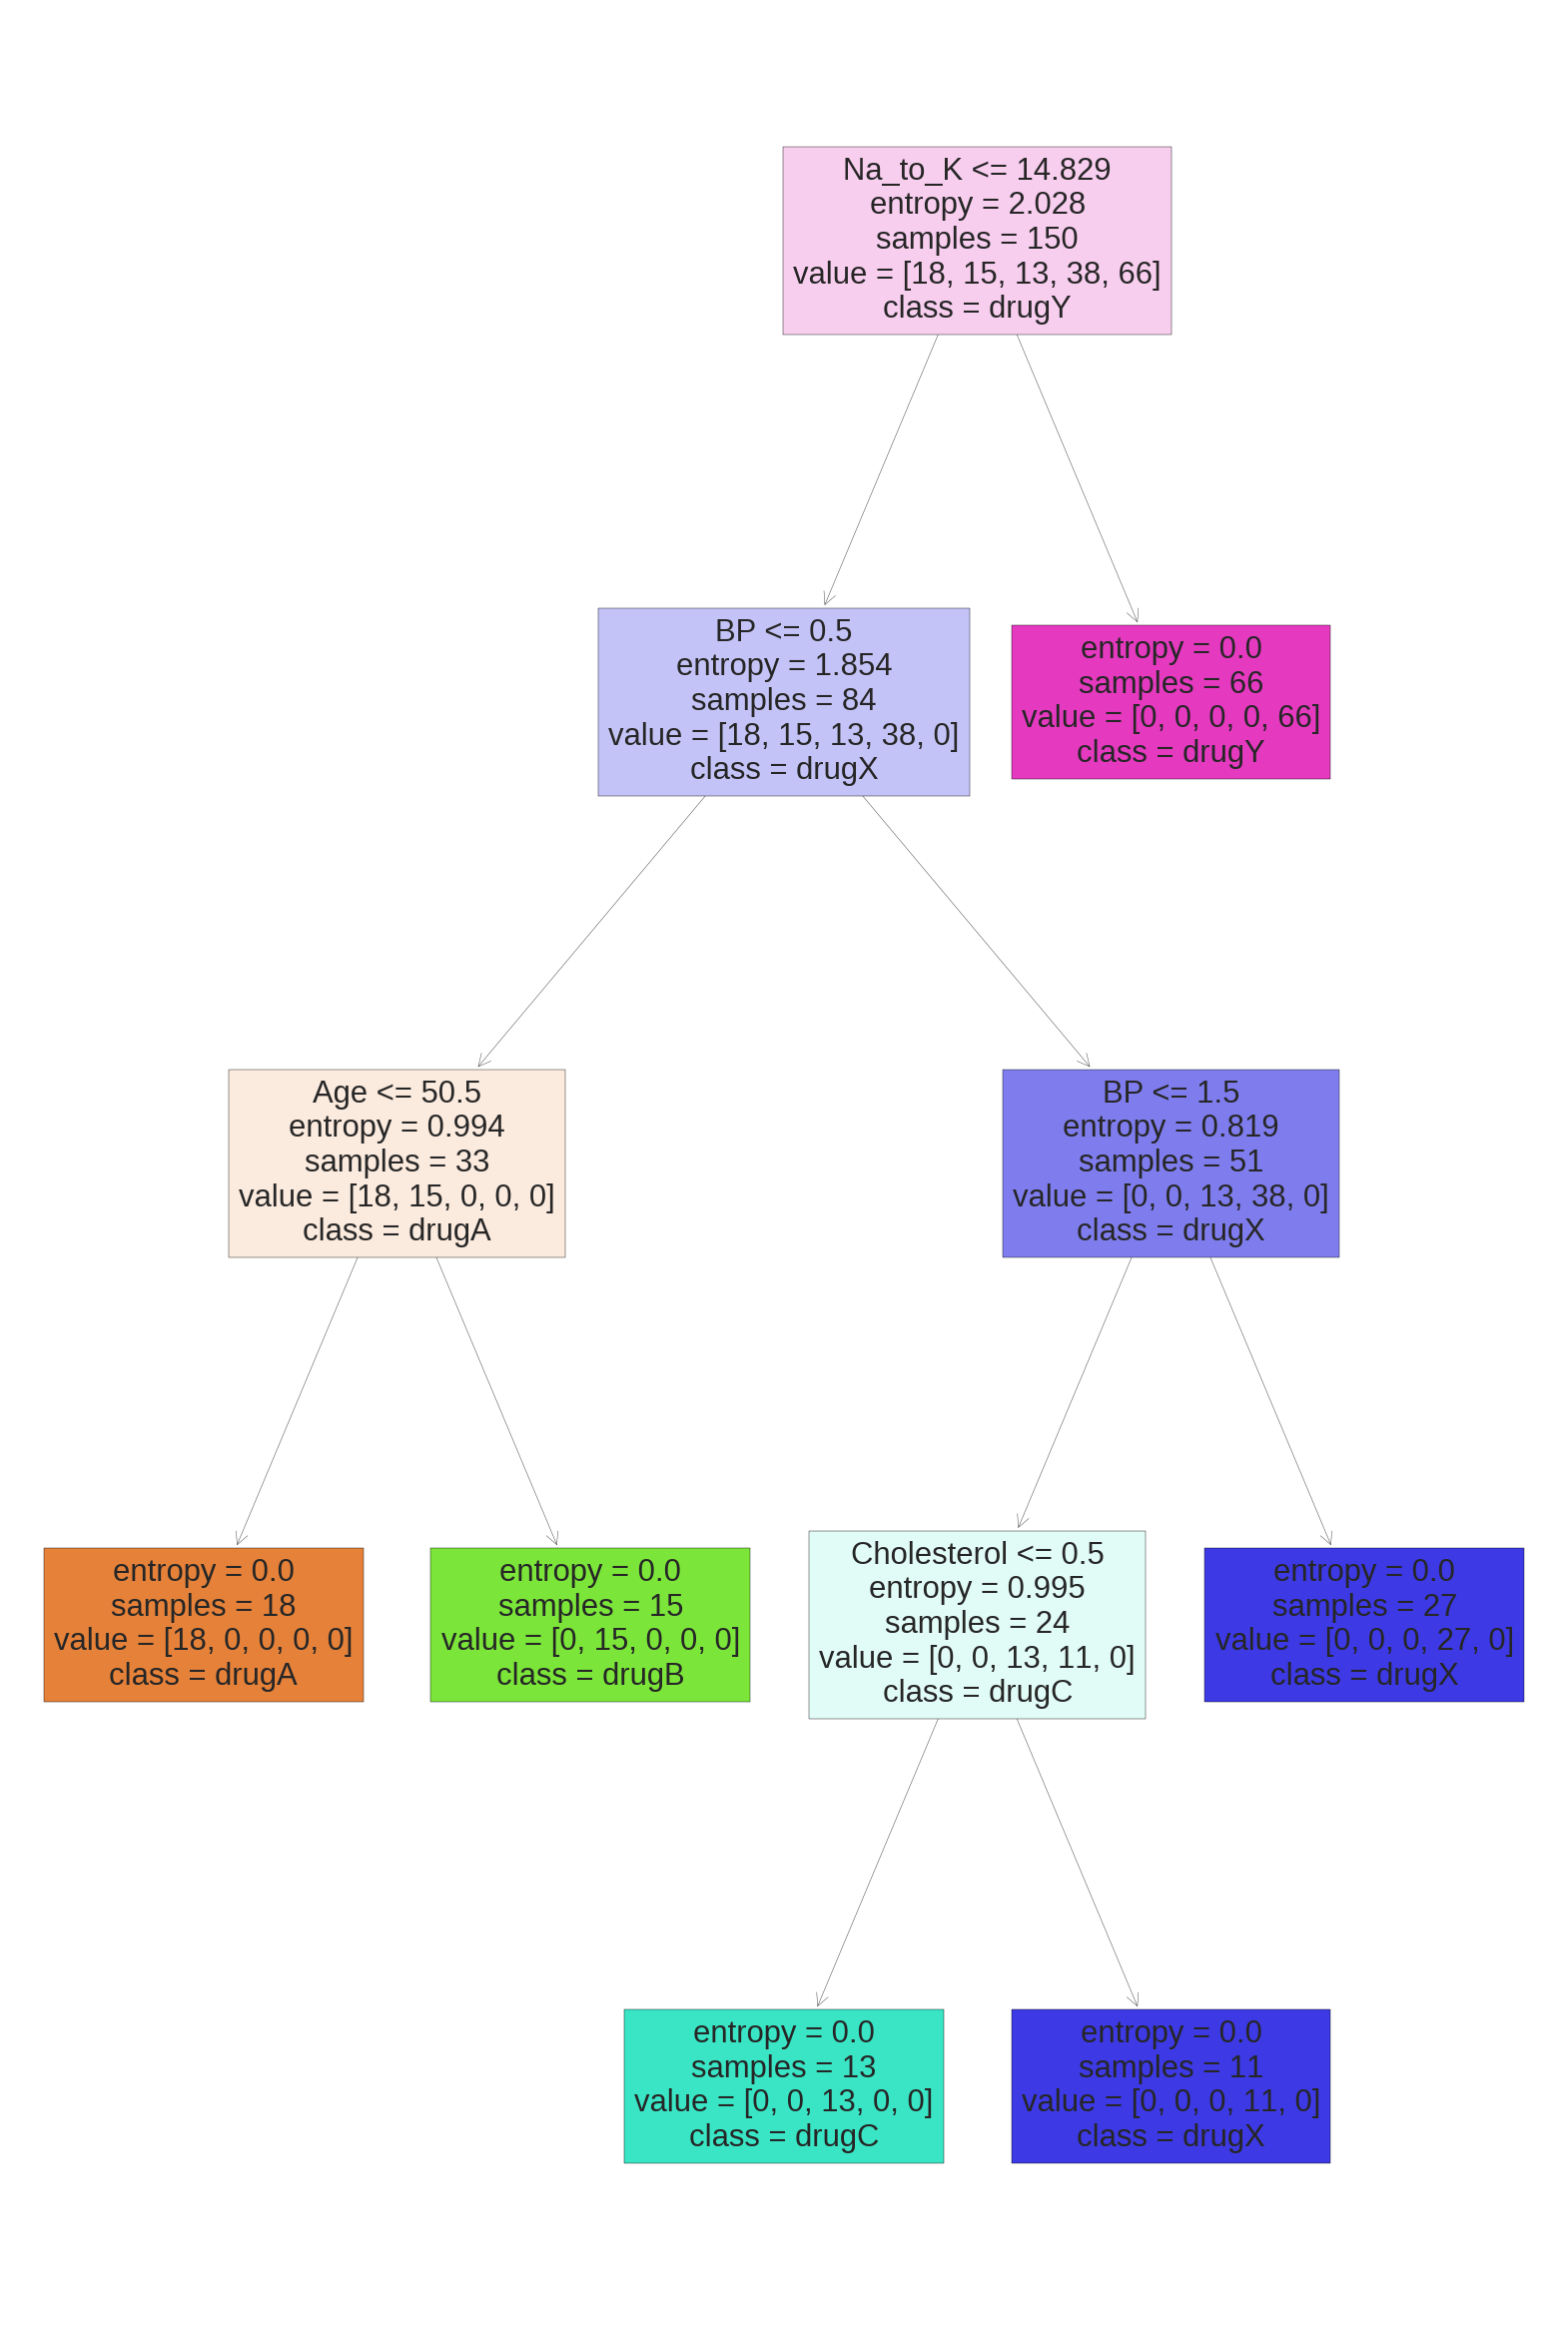

In [346]:
previsores = ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,30))
tree.plot_tree(decision_tree_drug, feature_names=previsores, class_names= ['drugA', 'drugB', 'drugC', 'drugX', 'drugY'], filled=True);
fig.savefig('decision_tree_drug.png')